#### Practical No.6
# Simple Linear Regression  
### GUNGUN JAIN T085
Using Indian KIDS SCREEN TIME

Introduction

In this notebook, we perform Simple Linear Regression using the Indian_Kids_Screen_Time.csv dataset.

We will:

Load and inspect the dataset

Select two numerical variables:
Age (independent variable X)
Avg_Daily_Screen_Time_hr (dependent variable y)

Visualise the relationship between age and daily screen time

Fit a simple linear regression model

Evaluate the model using R² and error metrics

Visualise training and testing predictions

Interpret the regression line (slope and intercept)

## Import Required Python Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_theme()


## Load the Indian KIDS SCREEN TIME

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Dataset Overview

In [ ]:
# Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [ ]:
# Check for missing values
df.isna().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


Variables of Interest

For simple linear regression we need:

One independent variable (X)

One dependent variable (y)

In this context:

Age = age of the child (years) → X

Avg_Daily_Screen_Time_hr = average daily screen time (hours) → y

We want to see whether older children tend to spend more time on screens,
and if we can predict daily screen time from age.

## Exploratory Data Analysis – Scatter Plot

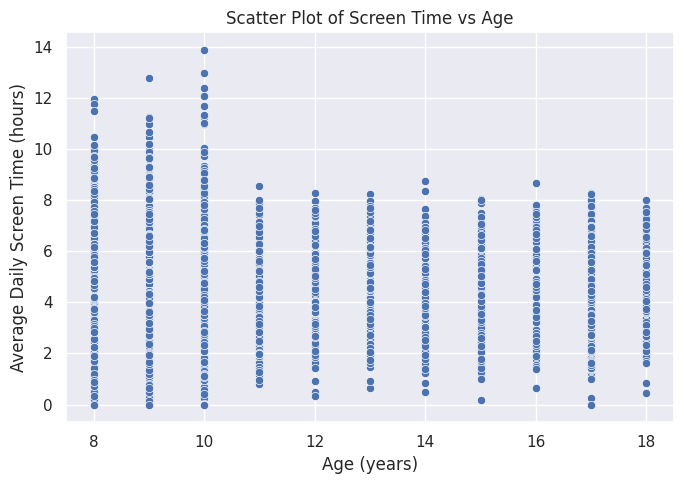

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr')
plt.title('Scatter Plot of Screen Time vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.tight_layout()
plt.show()


## Select Features and Target

In [ ]:
# Drop rows where Age or Avg_Daily_Screen_Time_hr is missing
data = df[['Age', 'Avg_Daily_Screen_Time_hr']].dropna()

X = data[['Age']]                       # 2D array for sklearn
y = data['Avg_Daily_Screen_Time_hr']    # 1D array

print("Number of valid records:", len(data))
X.head(), y.head()


Number of valid records: 9712


(   Age
 0   14
 1   11
 2   18
 3   15
 4   12,
 0    3.99
 1    4.61
 2    3.73
 3    1.21
 4    5.89
 Name: Avg_Daily_Screen_Time_hr, dtype: float64)

## Train-Test Split

In [ ]:
# Splitting data for predicting screen time from age
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 7769
Test set size: 1943


## Fit Simple Linear Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Model trained successfully.")

Model trained successfully.


## Model Evaluation on Training Data

In [ ]:
# Predictions on training data (predicting screen time from age)
y_train_pred = regressor.predict(X_train)

# R² score
r2_train = r2_score(y_train, y_train_pred)

# Error metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training MAE:", mae_train)


Training R²: 0.011733737844055181
Training MSE: 2.932995060585475
Training RMSE: 1.7125989199416993
Training MAE: 1.2925572650472883


## Model Evaluation on Test Data

In [ ]:
# Predictions on test data (predicting screen time from age)
y_test_pred = regressor.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test R²:", r2_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)


Test R²: 0.02212150467850682
Test MSE: 2.8234875430727766
Test RMSE: 1.6803236423596428
Test MAE: 1.2756678701111044


## Plot: Training Data with Regression Line

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


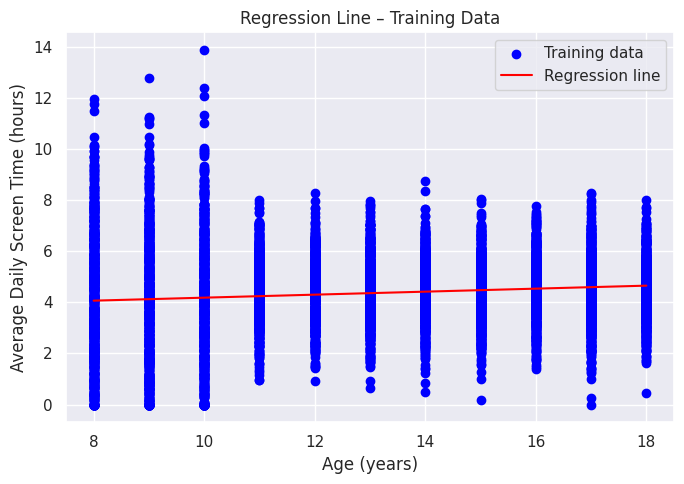

In [ ]:
plt.figure(figsize=(7, 5))

# Scatter of training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Regression line: sort X for a clean line
X_line = np.linspace(
    X_train['Age'].min(),
    X_train['Age'].max(),
    100
).reshape(-1, 1)

y_line = regressor.predict(X_line)

plt.plot(X_line, y_line, color='red', label='Regression line')

plt.title('Regression Line – Training Data')
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.legend()
plt.tight_layout()
plt.show()


## Plot: Test Data vs Predictions

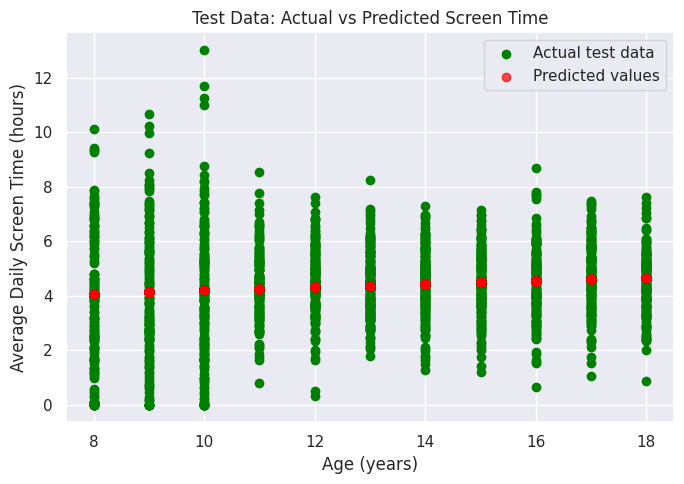

In [ ]:
plt.figure(figsize=(7, 5))

# Scatter of test data
plt.scatter(X_test, y_test, color='green', label='Actual test data')

# Predicted points for the same X_test
plt.scatter(X_test, y_test_pred, color='red', alpha=0.7, label='Predicted values')

plt.title('Test Data: Actual vs Predicted Screen Time')
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.legend()
plt.tight_layout()
plt.show()


## Regression Line Equation

In [ ]:
coef = regressor.coef_[0]
intercept = regressor.intercept_

print(f'Coefficient (slope): {coef}')
print(f'Intercept: {intercept}')
print(f'Linear equation: Avg_Daily_Screen_Time_hr = {coef:.3f} * Age + {intercept:.3f}')


Coefficient (slope): 0.058826084990001845
Intercept: 3.599415987463793
Linear equation: Avg_Daily_Screen_Time_hr = 0.059 * Age + 3.599


Interpretation (Updated for Screen-Time Dataset)

The slope (coefficient) tells us how much the average daily screen time is expected to change
when Age increases by 1 year.

The intercept is the expected screen time when age is 0 (not meaningful in real life,
but mathematically required for the linear equation).

The R² score tells us how well Age explains the variation in Avg_Daily_Screen_Time_hr.

This demonstrates simple linear regression on a real dataset using two related variables:
age and daily screen-time usage.